In [ ]:
!pip install networkx

In [ ]:
import zipfile
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import plotly.graph_objects as go
from networkx.drawing.nx_pydot import write_dot

Data preprocessing

In [ ]:
# Google Drive
drive.mount('/content/drive')

zip_path = "/content/drive/My Drive/ns project.zip"
extract_path = "/content/ns_project"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Java CSV
def process_java_dependency(input_file, output_file="Java_graph_new.dot"):
    G = nx.DiGraph()
    with open(input_file, 'r') as file:
        for line in file:
            line = line.strip()
            if " -> " in line:
                source, target = line.split(" -> ")
                G.add_edge(source.strip(), target.strip())
    write_dot(G, output_file)
    print(f"Java DOT file saved to {output_file}")

# Python CSV, Filter out rows where requirement is Nan
def process_python_dependency(input_file, output_file="Python_graph_new.dot"):
    df = pd.read_csv(input_file, header=0)
    df = df.dropna(subset=["requirement"])
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row["package"].strip(), row["requirement"].strip())
    write_dot(G, output_file)
    print(f"Python DOT file saved to {output_file}")

# R CSV, Remove blank lines
def process_r_dependency(input_file, output_file="R_graph_new.dot"):
    df = pd.read_csv(input_file, header=0)
    df = df[["from", "to"]].dropna()
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row["from"].strip(), row["to"].strip())
    write_dot(G, output_file)
    print(f"R DOT file saved to {output_file}")


In [ ]:
# Java
process_java_dependency(
    "/content/ns_project/ns project/Javadependency.csv",
    "/content/ns_project/Java_graph_new.dot"
)
# Python
process_python_dependency(
    "/content/ns_project/ns project/pythondependency.csv",
    "/content/ns_project/Python_graph_new.dot"
)
# R
process_r_dependency(
    "/content/ns_project/ns project/Rdependency.csv",
    "/content/ns_project/R_graph_new.dot"
)

Java DOT file saved to /content/ns_project/Java_graph_new.dot
Python DOT file saved to /content/ns_project/Python_graph_new.dot
R DOT file saved to /content/ns_project/R_graph_new.dot


In [ ]:
# Load .dot files
java_dot_path = "/content/ns_project/Java_graph_new.dot"
python_dot_path = "/content/ns_project/Python_graph_new.dot"
r_dot_path = "/content/ns_project/R_graph_new.dot"

# read graphs
G_java = nx.drawing.nx_pydot.read_dot(java_dot_path)
G_python = nx.drawing.nx_pydot.read_dot(python_dot_path)
G_r = nx.drawing.nx_pydot.read_dot(r_dot_path)

# print the number of nodes and edges
print(f"Java Network: {len(G_java.nodes())} nodes, {len(G_java.edges())} edges")
print(f"Python Network: {len(G_python.nodes())} nodes, {len(G_python.edges())} edges")
print(f"R Network: {len(G_r.nodes())} nodes, {len(G_r.edges())} edges")


Java Network: 1538 nodes, 8032 edges
Python Network: 29150 nodes, 72943 edges
R Network: 2471 nodes, 5451 edges


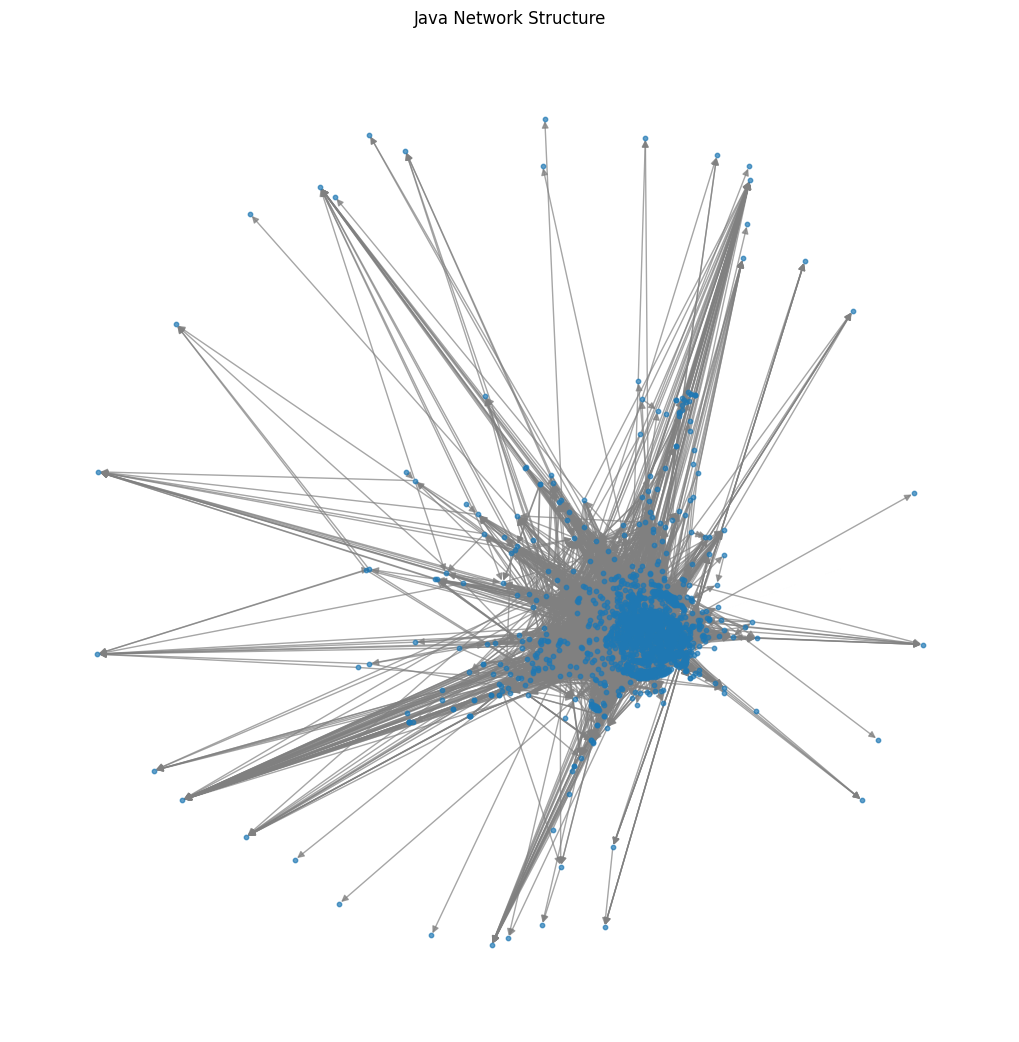

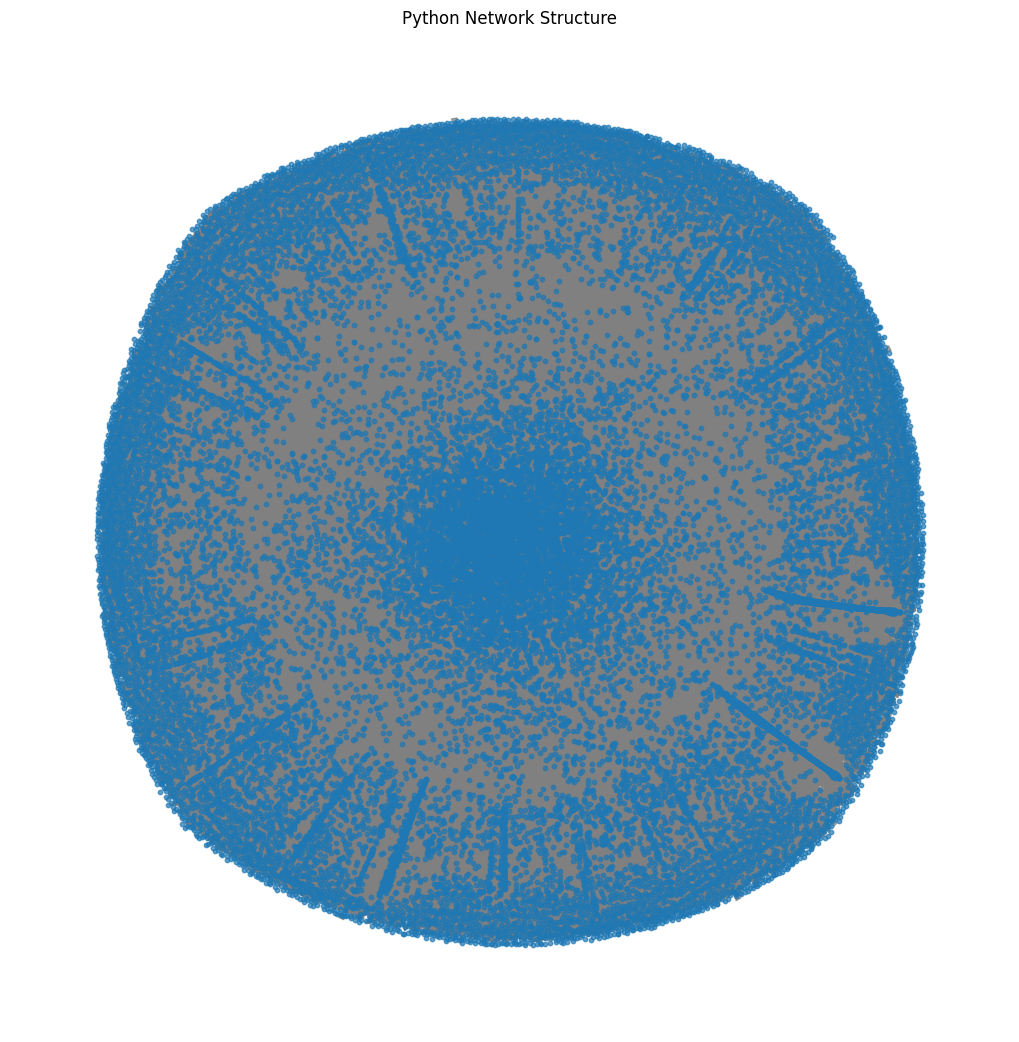

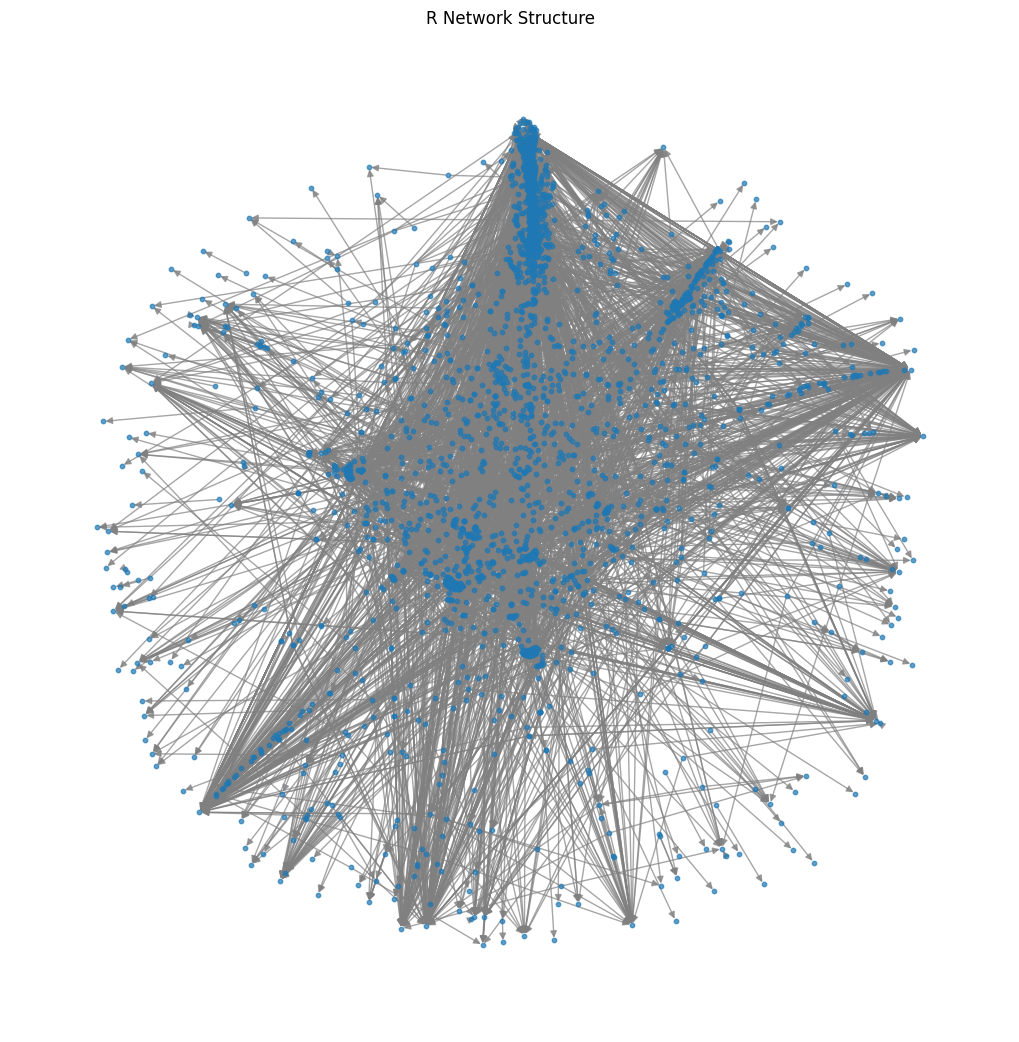

In [ ]:
def visualize_network(G, title="Network Structure"):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.7)
    plt.title(title)
    plt.show()

# Java
visualize_network(G_java, "Java Network Structure")
# Python
visualize_network(G_python, "Python Network Structure")
# R
visualize_network(G_r, "R Network Structure")

In [ ]:
# Calculate betweenness centrality
betweenness_java = nx.betweenness_centrality(G_java, normalized=True)
betweenness_python = nx.betweenness_centrality(G_python, normalized=True)
betweenness_r = nx.betweenness_centrality(G_r, normalized=True)

# top 10 in java
top_java_nodes = sorted(betweenness_java.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Java Nodes by Betweenness Centrality:")
for node, centrality in top_java_nodes:
    print(f"Node: {node}, Betweenness: {centrality:.5f}")

# top 10 in python
top_python_nodes = sorted(betweenness_python.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Python Nodes by Betweenness Centrality:")
for node, centrality in top_python_nodes:
    print(f"Node: {node}, Betweenness: {centrality:.5f}")

# top 10 in r
top_r_nodes = sorted(betweenness_r.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 R Nodes by Betweenness Centrality:")
for node, centrality in top_r_nodes:
    print(f"Node: {node}, Betweenness: {centrality:.5f}")


Top 10 Java Nodes by Betweenness Centrality:
Node: java.lang.Class, Betweenness: 0.07249
Node: java.lang.String, Betweenness: 0.06719
Node: java.util.Locale, Betweenness: 0.05017
Node: java.lang.Object, Betweenness: 0.04842
Node: java.nio.ByteBuffer, Betweenness: 0.04339
Node: java.io.File, Betweenness: 0.03748
Node: java.lang.SecurityManager, Betweenness: 0.03663
Node: java.net.URI, Betweenness: 0.03399
Node: java.io.ObjectInputStream, Betweenness: 0.02924
Node: java.awt.Component, Betweenness: 0.02659

Top 10 Python Nodes by Betweenness Centrality:
Node: 115wangpan-0.7.6, Betweenness: 0.00000
Node: beautifulsoup4, Betweenness: 0.00000
Node: homura, Betweenness: 0.00000
Node: humanize, Betweenness: 0.00000
Node: pycurl, Betweenness: 0.00000
Node: pysocks, Betweenness: 0.00000
Node: requests, Betweenness: 0.00000
Node: six, Betweenness: 0.00000
Node: 199Fix-1.1.2, Betweenness: 0.00000
Node: django, Betweenness: 0.00000

Top 10 R Nodes by Betweenness Centrality:
Node: MASS, Betweenness:

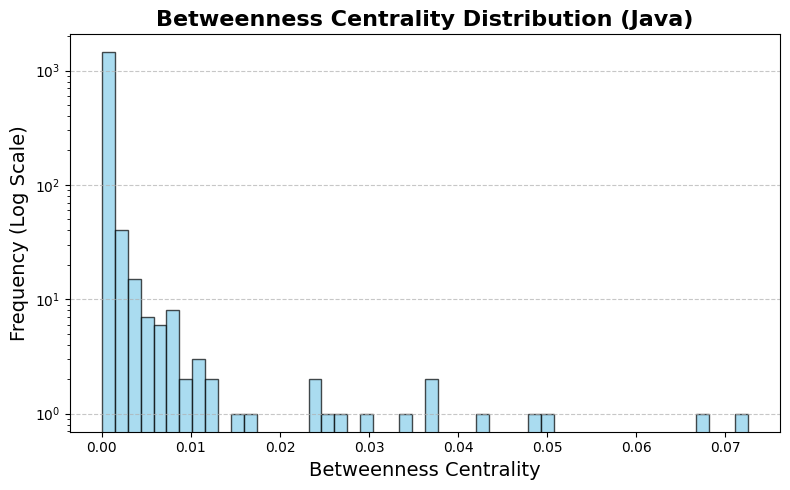

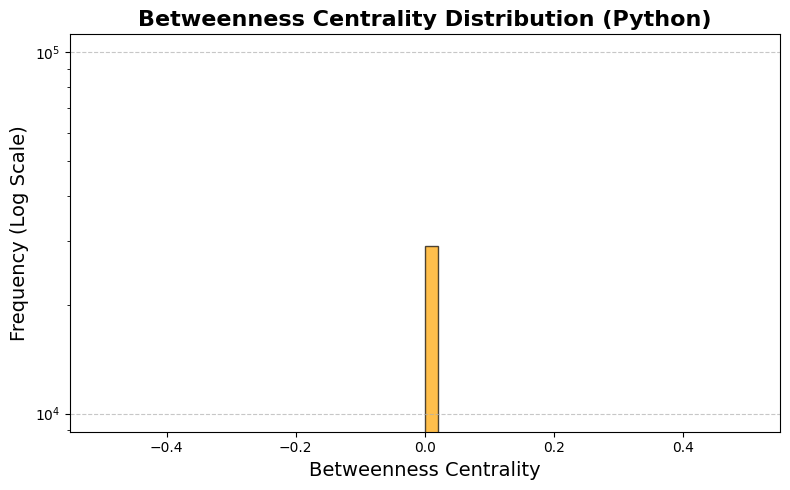

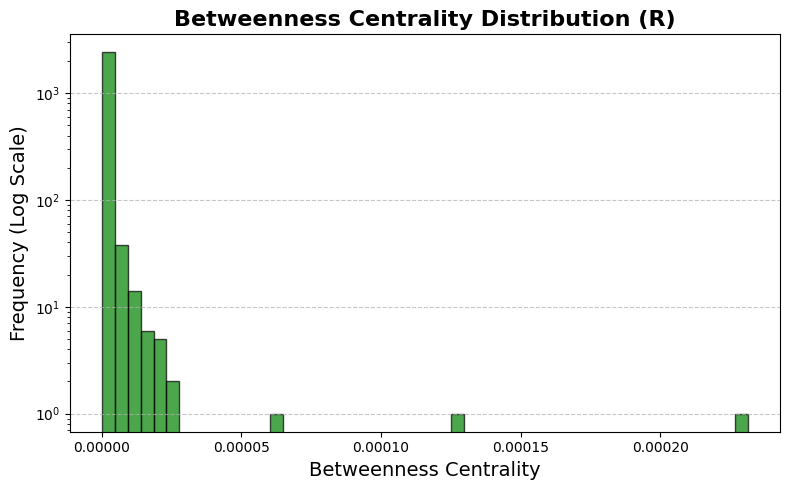

<Figure size 640x480 with 0 Axes>

In [ ]:
# Separate plots for better clarity
def plot_histogram(data, title, color):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=50, alpha=0.7, color=color, log=True, edgecolor='black')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Betweenness Centrality', fontsize=14)
    plt.ylabel('Frequency (Log Scale)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each network separately
plot_histogram(df_java['Betweenness'], 'Betweenness Centrality Distribution (Java)', 'skyblue')
plot_histogram(df_python['Betweenness'], 'Betweenness Centrality Distribution (Python)', 'orange')
plot_histogram(df_r['Betweenness'], 'Betweenness Centrality Distribution (R)', 'green')
